In [47]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
env = gym.make('gym_pagination:pagination-v0', p_dist=[0, 0, 0, 0, 0, 1, 0, 0, 0, 0], r_dist=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
class random_policy():
    def predict(self, observation):
        return np.random.randint(0, 6)
    
    def train(self, action, observation, new_observation, reward, done, info):
        pass


In [50]:
policy = random_policy()

rewards = []
for episode in range(1000):

    obs = env.reset()
    total_reward = 0
    done = False
    while not done:

        # pick action
        a = policy.predict(obs)

        # make action
        new_obs, reward, done, info = env.step(a)
        total_reward += reward

        # update policy (if applicable)
        policy.train(a, obs, new_obs, reward, done, info)

        obs = new_obs
        
    rewards.append(total_reward)

31

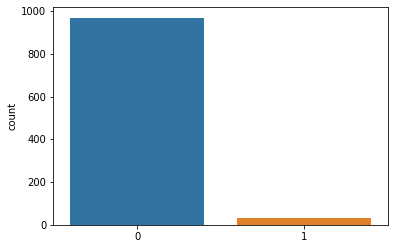

In [51]:
sns.countplot(x=rewards)
np.sum(rewards)

# Now we will attempt with a reinforcement learning agent

In [190]:
import operator
class reinforcement_learning_policy():
    def __init__(self, lr=0.95, gamma=0.9, exploration=0.05):
        self.lr = lr
        self.gamma = gamma
        self.exploration = exploration
        self.qtable = dict()
        
        self.replay = []
        
        for i in range(2): # observation space
            self.qtable[i] = dict()
            for j in range(6): # action space
                self.qtable[i][j] = np.random.rand()
                
    
    def predict(self, observation):
        
        if np.random.rand() < self.exploration:
            return np.random.randint(0,6)
        
        max_a = max(self.qtable[observation].items(), key=operator.itemgetter(1))[0]
        # just returning max_a would be a greedy policy
              
            
        return max_a
    
    def train(self, action, observation, new_observation, reward, done):
        if not done:
            self.replay.append((observation, action, new_observation, reward))
        else:
            if (self.qtable[observation][action] < 0.05):
                self.qtable[observation][action] = 0
            print('training')
            print(f'{self.lr} * {self.qtable[observation][action]} + {reward} = {self.lr * self.qtable[observation][action] + reward}')            
            self.qtable[observation][action] = self.lr * self.qtable[observation][action] + reward
            self.replay.append((observation, action, new_observation, reward))

            for i in range(len(self.replay) -2 , 0, -1):
                obs, act, n_obs, reward = self.replay[i]
                _, n_act, _, _ = self.replay[i + 1]
                
                print()
                self.qtable[obs][act] = self.qtable[obs][act] * self.lr + reward + self.gamma * self.qtable[n_obs][n_act]
                
        


In [191]:
policy = reinforcement_learning_policy()



In [192]:
rewards = []
for episode in range(1000):

    obs = env.reset()
    total_reward = 0
    done = False
    obs = 0
    while not done:

        # pick action
        a = policy.predict(0)

        # make action
        new_obs, reward, done, info = env.step(a)
        new_obs = info['page_no']
                
        total_reward += reward
        

        # update policy (if applicable)
        policy.train(a, obs, new_obs, reward, done)

        obs = new_obs
        
    rewards.append(total_reward)

0.95 * 0.9216820317039621 + 0 = 0.875597930118764
0.95 * 0.875597930118764 + 0 = 0.8318180336128257
0.95 * 0.8739086880009374 + 0 = 0.8302132536008905
0.95 * 1.537419060172986 + 0 = 1.4605481071643367
0.95 * 3.280397000437994 + 0 = 3.116377150416094
0.95 * 11.945156485455081 + 0 = 11.347898661182327
0.95 * 74.49991983691673 + 0 = 70.77492384507089
0.95 * 824.4151513914069 + 0 = 783.1943938218365
0.95 * 16524.92211517216 + 0 = 15698.676009413552
0.95 * 606153.7567285865 + 0 = 575846.0688921572
0.95 * 40899069.83336562 + 0 = 38854116.341697335
0.95 * 5089699096.087013 + 0 = 4835214141.282662
0.95 * 1169856372518.8662 + 0 = 1111363553892.9229
0.95 * 497007047870358.3 + 0 = 472156695476840.4
0.95 * 3.904434744299488e+17 + 0 = 3.709213007084513e+17
0.95 * 5.673019076167947e+20 + 0 = 5.389368122359549e+20
0.95 * 1.5246913577482956e+24 + 0 = 1.4484567898608806e+24
0.95 * 7.580343431679926e+27 + 0 = 7.201326260095929e+27
0.95 * 6.9718815599664475e+31 + 0 = 6.623287481968124e+31
0.95 * 1.186242

2

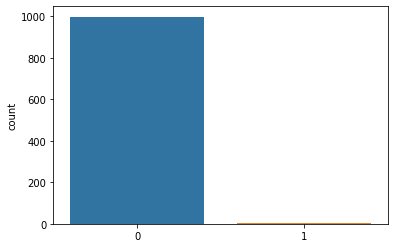

In [193]:
sns.countplot(x=rewards)
np.sum(rewards)

In [194]:
policy.qtable


{0: {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: 4.489793568183311e+180},
 1: {0: 1.0093134511072193e+135,
  1: 2.6766854898606358e+180,
  2: 0.6637907968080966,
  3: 0.016017550779646506,
  4: 0.3001773791080965,
  5: 0.19883476124167054}}